5. Implement Agglomerative hierarchical clustering algorithm using appropriate dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

In [2]:
# Load the dataset
X = pd.read_csv('CC GENERAL.csv')

# Dropping the 'CUST_ID' column
X = X.drop('CUST_ID', axis=1)

# Handling the missing values (forward fill method)
X.fillna(method='ffill', inplace=True)


/tmp/ipykernel_35146/1112556144.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X.fillna(method='ffill', inplace=True)


In [3]:
# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Normalizing the data
X_normalized = normalize(X_scaled)

# Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)


In [4]:
# Reducing the dimensions with PCA
pca = PCA(n_components=2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

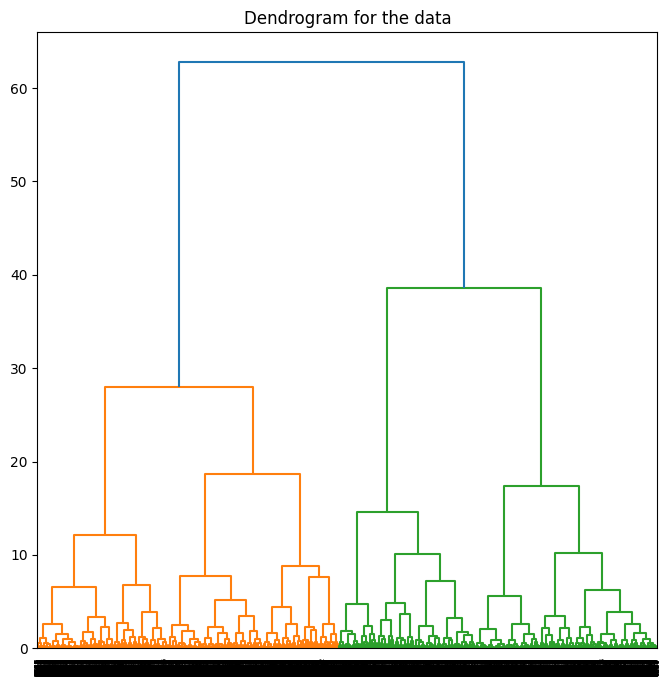

In [5]:
plt.figure(figsize=(8, 8))
plt.title('Dendrogram for the data')
dendrogram = shc.dendrogram(shc.linkage(X_principal, method='ward'))
plt.show()

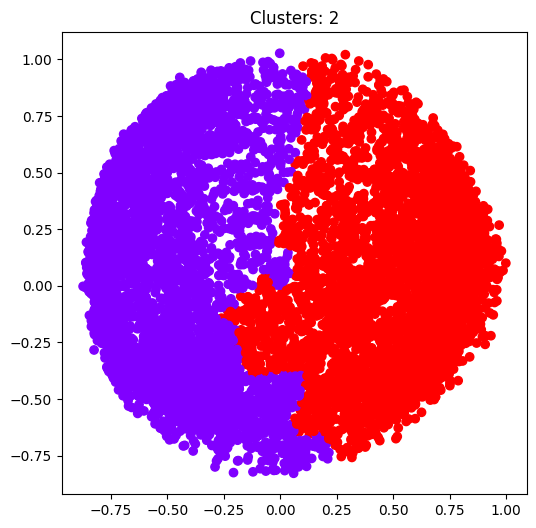

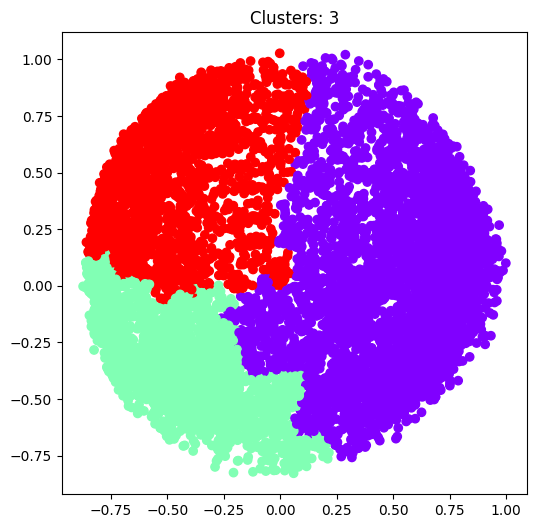

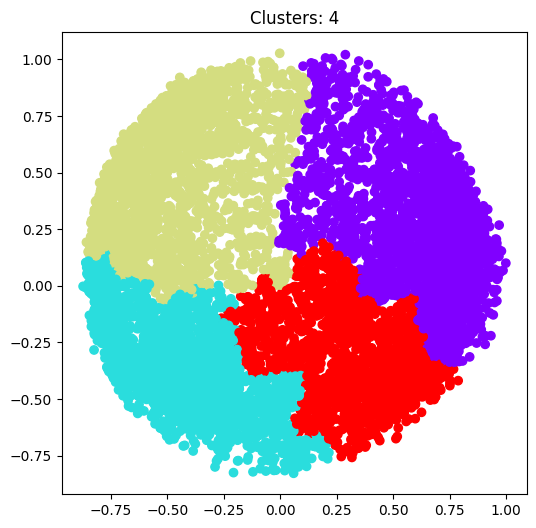

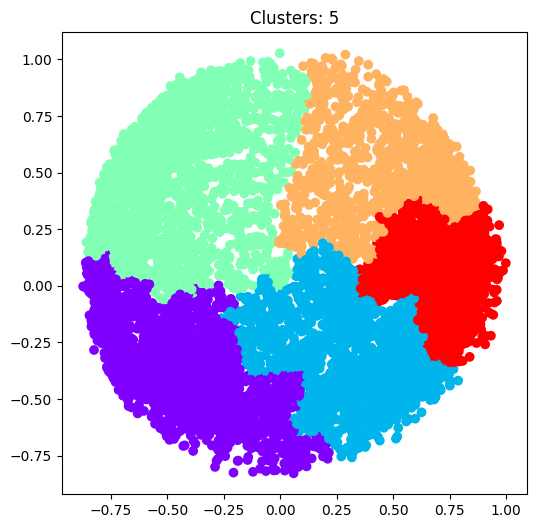

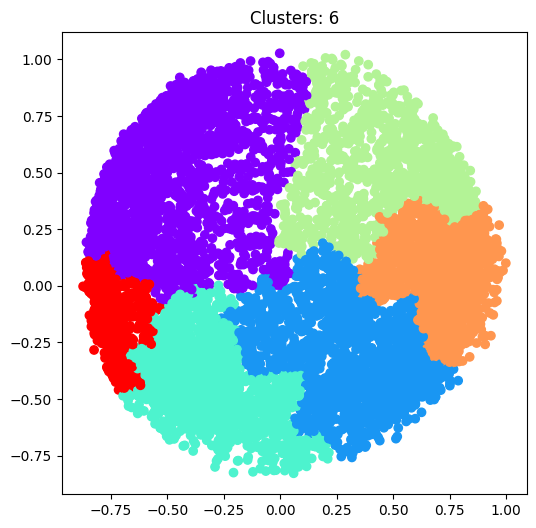

In [6]:
# Clustering with different number of clusters (k)
cluster_counts = [2, 3, 4, 5, 6]

for k in cluster_counts:
    ac = AgglomerativeClustering(n_clusters=k)
    plt.figure(figsize=(6, 6))
    plt.scatter(X_principal['P1'], X_principal['P2'], c=ac.fit_predict(X_principal), cmap='rainbow')
    plt.title(f'Clusters: {k}')
    plt.show()


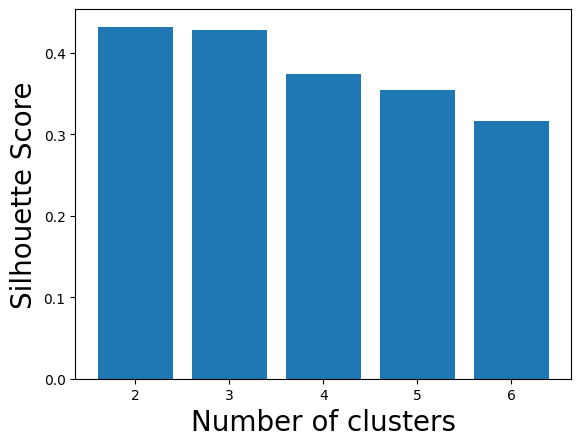

In [7]:
# Calculating silhouette scores for different k values
silhouette_scores = []

for k in cluster_counts:
    ac = AgglomerativeClustering(n_clusters=k)
    labels = ac.fit_predict(X_principal)
    silhouette_scores.append(silhouette_score(X_principal, labels))

# Plotting the silhouette scores
plt.bar(cluster_counts, silhouette_scores)
plt.xlabel('Number of clusters', fontsize=20)
plt.ylabel('Silhouette Score', fontsize=20)
plt.show()
